Importacion de Liberarias

In [1]:
import pandas as pd
import numpy as np

Carga de data homicidios

In [2]:
df_homicidios = pd.read_csv("./annual-number-of-deaths-by-cause.csv")
# Nos quedamos con las columnas que queremos
df_homicidios = df_homicidios[["Entity", "Code", "Year", "Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)"]]
# cambio de nombre a los campos
df_homicidios.rename(columns={ 'Entity': 'Country Name', 'Code': 'Country Code' ,'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)': 'Homicides' })

,Country Name,Country Code,Year,Homicides
0,Afghanistan,AFG,2007,3657.0
1,Afghanistan,AFG,2008,3785.0
2,Afghanistan,AFG,2009,3874.0
3,Afghanistan,AFG,2011,4170.0
4,Afghanistan,AFG,2012,4245.0
...,...,...,...,...
6888,Zimbabwe,ZWE,2015,1302.0
6889,Zimbabwe,ZWE,2016,1342.0
6890,Zimbabwe,ZWE,2017,1363.0
6891,Zimbabwe,ZWE,2018,1396.0


Carga de  data poblacion total

In [ ]:
df_total = pd.read_csv("./API_SP.POP.TOTL_DS2_es_csv_v2_5368140.csv")
df_total
#df_total['2007']

Traemos los valores de la poblacion mundial a la data de homicidios

In [4]:
import pandas as pd

# leer los datos en dos DataFrames diferentes

df1 = df_homicidios.rename(columns={ 'Entity': 'Country Name', 'Code': 'Country Code' ,'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)': 'Homicides' })
df2 = df_total
# crear una nueva columna en df1 para almacenar los valores correspondientes de df2
# crear una nueva columna en df1 para almacenar la población
df1['Poblacion'] = 0

# iterar sobre las filas de df1
for index, row in df1.iterrows():
    # obtener el país y el año de la fila actual
    pais = row['Country Code']
    anio = row['Year']
    
    # buscar la columna correspondiente en df2
    poblacion_col = str(anio)
    if poblacion_col in df2.columns:
        # buscar la fila correspondiente en df2
        df2_fila = df2[(df2['Country Code'] == pais)]
        
        # si se encontró una fila, obtener el valor de la población correspondiente
        if not df2_fila.empty:
            poblacion = df2_fila[poblacion_col].values[0]
            df1.at[index, 'Poblacion'] = poblacion


In [6]:
df1.isna().sum()

Country Name      0
Country Code    704
Year              0
Homicides        53
Poblacion         0
dtype: int64

In [9]:
# df1[df1['Homicides'] == 'NaN']
df1[df1.isna() == False]

,Country Name,Country Code,Year,Homicides,Poblacion
0,Afghanistan,AFG,2007,3657.0,25903301
1,Afghanistan,AFG,2008,3785.0,26427199
2,Afghanistan,AFG,2009,3874.0,27385307
3,Afghanistan,AFG,2011,4170.0,29249157
4,Afghanistan,AFG,2012,4245.0,30466479
...,...,...,...,...,...
6888,Zimbabwe,ZWE,2015,1302.0,14154937
6889,Zimbabwe,ZWE,2016,1342.0,14452704
6890,Zimbabwe,ZWE,2017,1363.0,14751101
6891,Zimbabwe,ZWE,2018,1396.0,15052184


In [ ]:
filas_nulas = df1[df1['Homicides'].isnull()]

# imprimir las filas encontradas
print(filas_nulas)

In [ ]:
df1.info()

In [66]:
df1 = df1.dropna()

In [70]:
df1.isnull().sum()

Country Name           0
Country Code           0
Year                   0
Homicides              0
Poblacion              0
Tasa por cada 100K    90
dtype: int64

Generando la tasa de homicidios por cada 100K

In [68]:
df1['Tasa por cada 100K'] = (df1['Homicides'] / df1['Poblacion']) * 100000

C:\Users\alfre\AppData\Local\Temp\ipykernel_32264\649393328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tasa por cada 100K'] = (df1['Homicides'] / df1['Poblacion']) * 100000


In [ ]:
df1[df1['Country Name'] == 'Peru']

Guardado de Tabla homicidios por cada 100K habitantes

In [78]:
df1.to_csv('homicides100K.csv', index=False)

Remesas

Promedio de homicidios para los paises top 5

In [ ]:
df_top5 = df1[(df1['Country Name'] == 'Spain') | (df1['Country Name'] == 'Belgium') | (df1['Country Name'] == 'Switzerland') | (df1['Country Name'] == 'Denmark') | (df1['Country Name'] == 'Germany')]

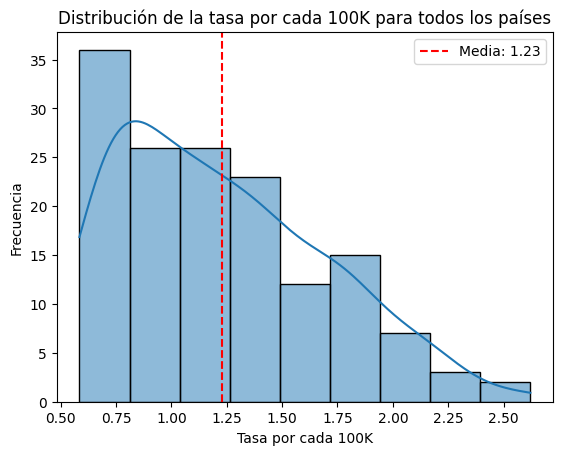

In [96]:
import seaborn as sns

# Crea un histograma de la columna 'Tasa por cada 100K' para todos los países
sns.histplot(data=df_top5, x='Tasa por cada 100K', kde=True)

# Calcula la media de la columna 'Tasa por cada 100K'
mean = df_top5['Tasa por cada 100K'].mean()

# Agrega una línea vertical en la media
plt.axvline(x=mean, color='red', linestyle='--', label=f'Media: {mean:.2f}')

# Personaliza la gráfica
plt.xlabel('Tasa por cada 100K')
plt.ylabel('Frecuencia')
plt.title('Distribución de la tasa por cada 100K para todos los países')
plt.legend()

# Muestra la gráfica
plt.show()


In [98]:
percentil_95 = df_top5['Tasa por cada 100K'].quantile(q=0.95)
percentil_95

2.1070343996371887